## Здравствуйте!! Данную лабораторную работу выполнила Скрипникова София при поддержке своих друзей

## Решающие деревья

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=0.8, random_state=3, n_redundant=0)
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

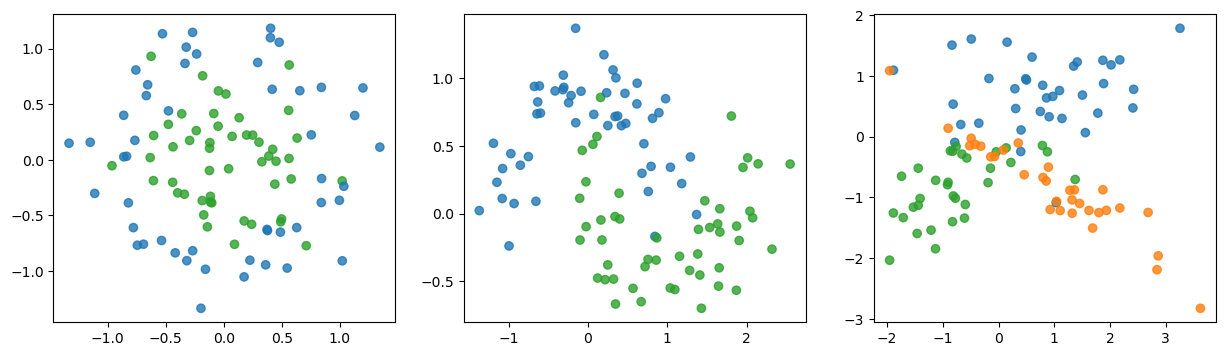

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

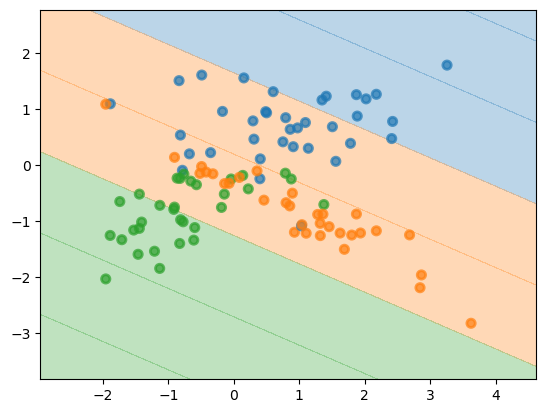

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\2702189661.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


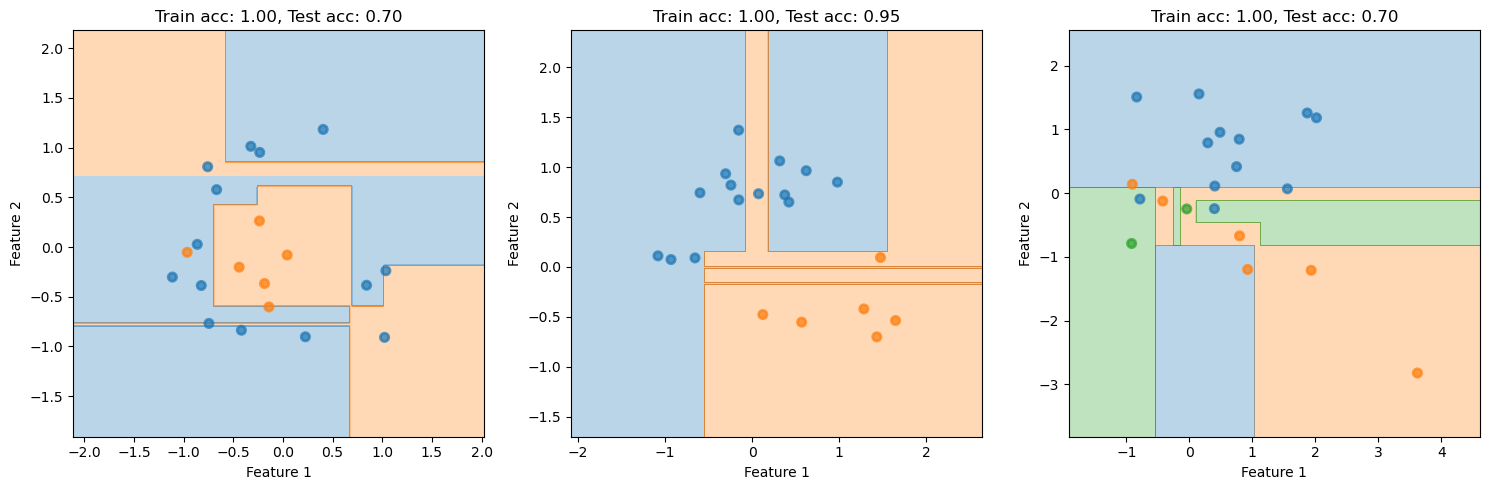

In [9]:
fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, DT.predict(X_train))
    test_acc = accuracy_score(y_test, DT.predict(X_test))

    plt.sca(axes[i])  
    plot_surface(DT, X_test, y_test)
    axes[i].set_title(f"Train acc: {train_acc:.2f}, Test acc: {test_acc:.2f}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

### Обучающая выборка всегда 1, т.е 100%,т.е очень очень точно. Графики показывают, что модель переобучается, строятся различные разделяющие плоскости


__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

min_samples_leaf=5
Train accuracy: 0.9125, Test accuracy: 0.9
Train accuracy: 0.9625, Test accuracy: 0.8


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.9, Test accuracy: 0.85


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


min_samples_leaf=10
Train accuracy: 0.85, Test accuracy: 0.85


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.9125, Test accuracy: 0.8


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.85, Test accuracy: 0.95


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


min_samples_leaf=15
Train accuracy: 0.8, Test accuracy: 0.7


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.85, Test accuracy: 0.75


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.85, Test accuracy: 0.95


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\2913301256.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


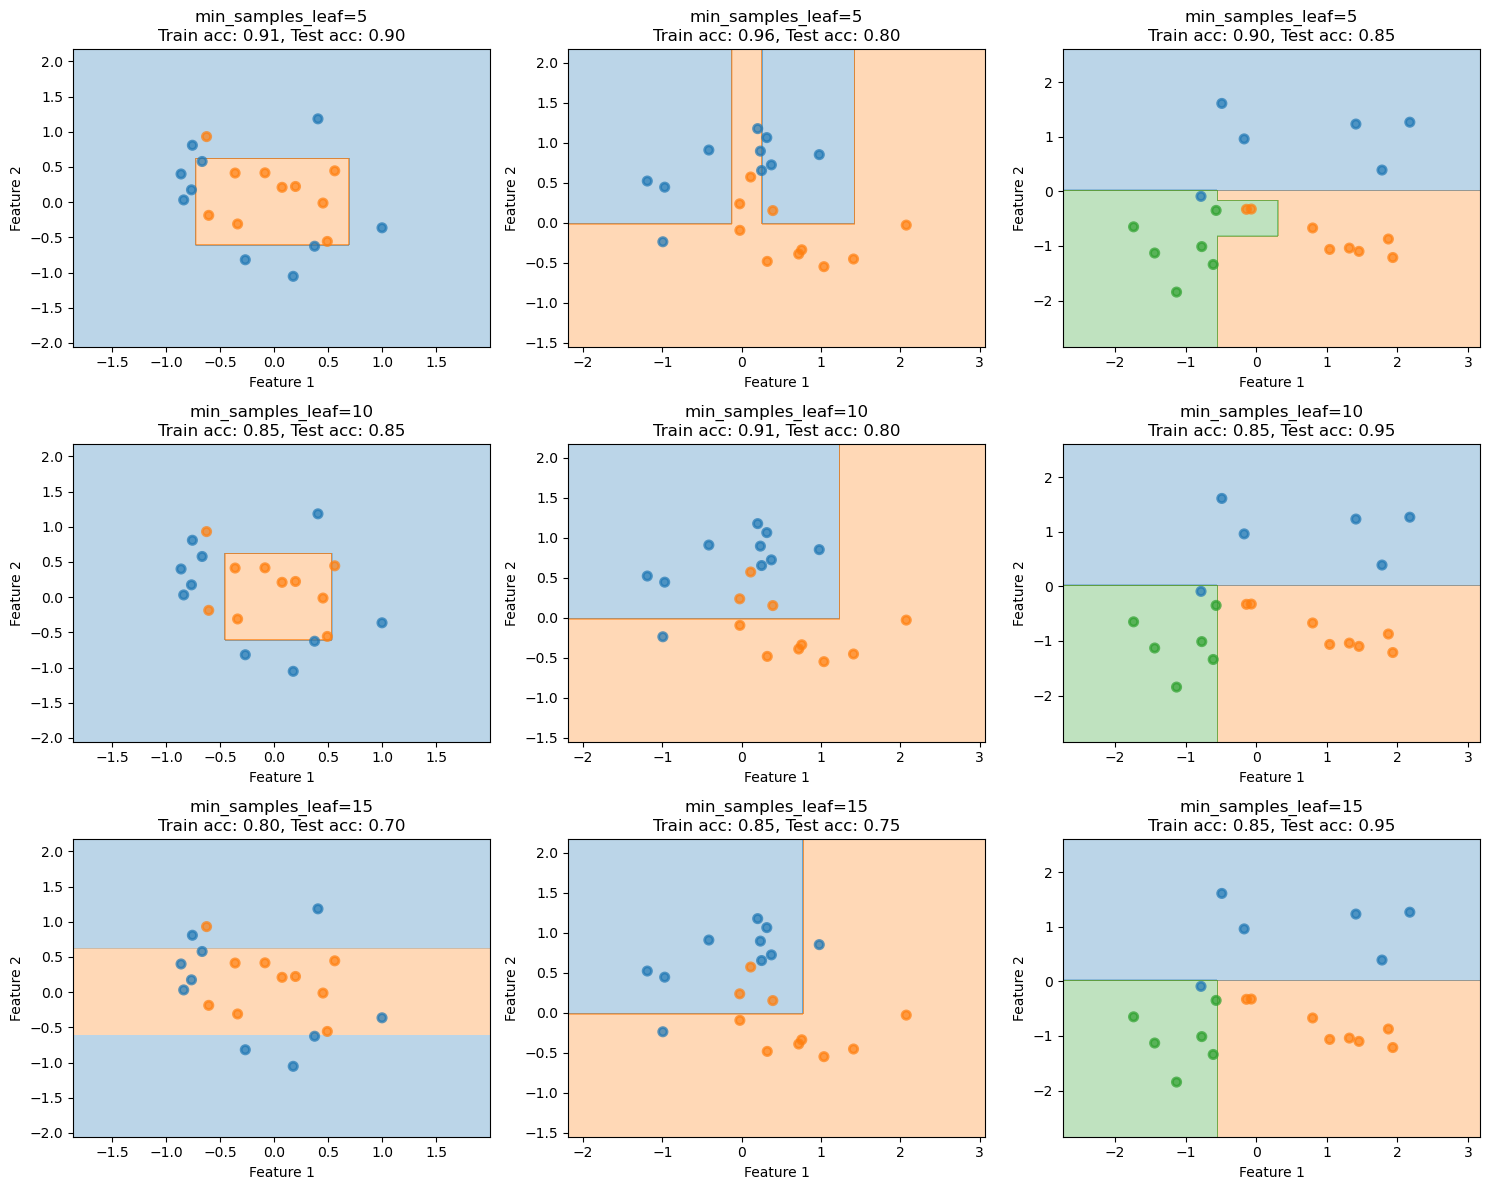

In [11]:
min_samples_leaf_values = [5, 10, 15]
num_datasets = len(datasets)
fig, axes = plt.subplots(len(min_samples_leaf_values), num_datasets, figsize=(15, 12))

for row, min_samples_leaf in enumerate(min_samples_leaf_values):
    print(f'min_samples_leaf={min_samples_leaf}')

    for col in range(num_datasets):
        x, y = datasets[col]  # Получаем данные
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
        DT = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf).fit(x_train, y_train)

        # Вычисляем точность на обучающей и тестовой выборках
        train_acc = accuracy_score(y_train, DT.predict(x_train))
        test_acc = accuracy_score(y_test, DT.predict(x_test))
        print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc}')

        # Устанавливаем текущий подграфик
        ax = axes[row, col]

        # Переключаемся на текущий подграфик и строим график
        plt.sca(ax)  # Устанавливаем ax как текущий график
        plot_surface(DT, x_test, y_test)  # предполагается, что plot_surface() работает с текущим графиком
        ax.set_title(f"min_samples_leaf={min_samples_leaf}\nTrain acc: {train_acc:.2f}, Test acc: {test_acc:.2f}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

max_depth=3
Train accuracy: 0.875, Test accuracy: 0.75
Train accuracy: 0.95, Test accuracy: 0.8


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.875, Test accuracy: 0.95


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


max_depth=5
Train accuracy: 0.975, Test accuracy: 0.85


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.9875, Test accuracy: 0.9


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.925, Test accuracy: 0.8


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


max_depth=7
Train accuracy: 1.0, Test accuracy: 0.7


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 1.0, Test accuracy: 0.8


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


Train accuracy: 0.975, Test accuracy: 0.8


C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\683238394.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
C:\Users\gfdsa\AppData\Local\Temp\ipykernel_9792\2458431295.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


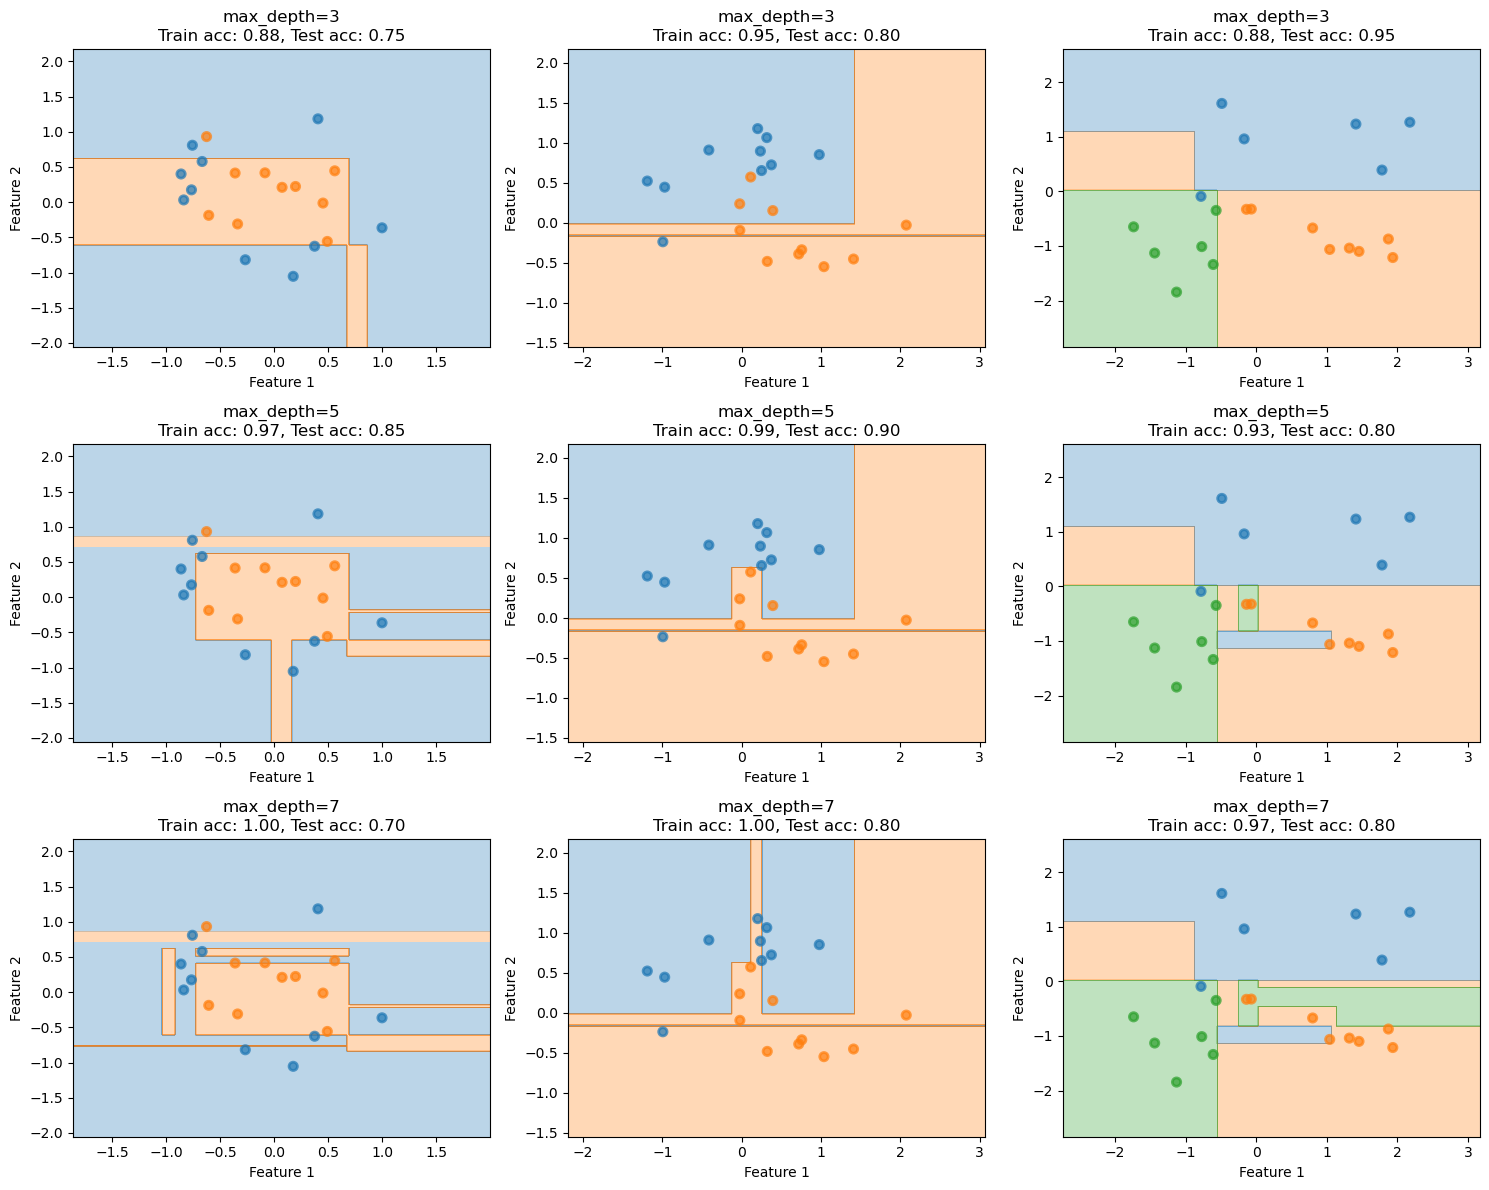

In [12]:
max_depth_values = [3, 5, 7]
num_datasets = len(datasets)
fig, axes = plt.subplots(len(max_depth_values), num_datasets, figsize=(15, 12))

for row, max_depth in enumerate(max_depth_values):
    print(f'max_depth={max_depth}')

    for col in range(num_datasets):
        x, y = datasets[col]
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
        DT = DecisionTreeClassifier(max_depth=max_depth).fit(x_train, y_train)

        # Вычисляем точность на обучающей и тестовой выборках
        train_acc = accuracy_score(y_train, DT.predict(x_train))
        test_acc = accuracy_score(y_test, DT.predict(x_test))
        print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc}')

        # Устанавливаем текущий подграфик
        ax = axes[row, col]

        # Переключаемся на текущий подграфик и строим график
        plt.sca(ax)  # Устанавливаем ax как текущий график
        plot_surface(DT, x_test, y_test)  # предполагается, что plot_surface() работает с текущим графиком
        ax.set_title(f"max_depth={max_depth}\nTrain acc: {train_acc:.2f}, Test acc: {test_acc:.2f}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

### Изменение параметров регуляризации по-разному влияет на структуру деревьев решений. Низкие значения показывают низкую точность на обучающих и тестовых выборках, а высокие наоборот. Но с появлением более высоких значений, возрастает риск переобучения

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [36]:
%load_ext autoreload
%autoreload 2

import numpy as np

from hw5code import find_best_split
from hw5code import DecisionTree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [24]:
import pandas as pd
students = pd.read_csv('students.csv')
students.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


### рассмотрим 5 признаков

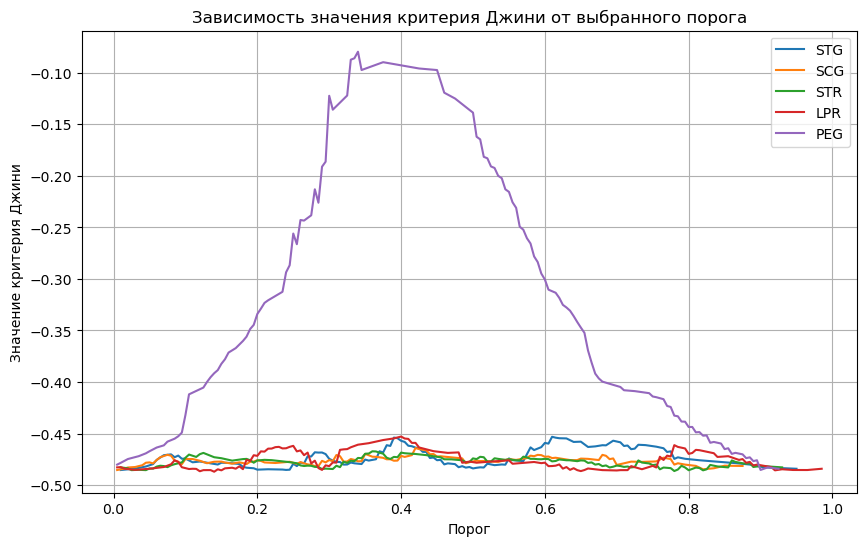

In [37]:
import matplotlib.pyplot as plt

target = students[' UNS']
features = students.drop(columns = ' UNS')
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('Зависимость значения критерия Джини от выбранного порога')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')

for column_name in features.columns:
    thr, gini, thr_best, gini_best = find_best_split(features[column_name].values, target.values)
    plt.plot(thr, gini, label=column_name)
plt.legend()

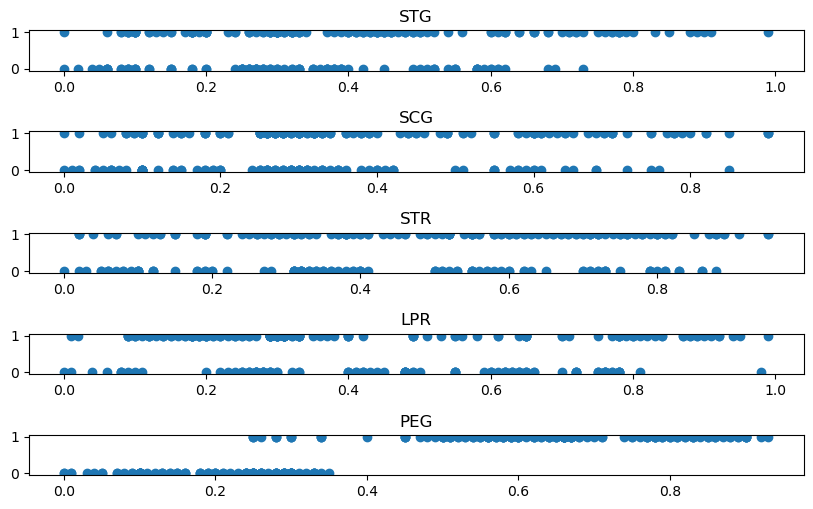

In [38]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, hspace=1.5)
for i, column_name in enumerate(features.columns):
    plt.subplot(5, 1, i + 1)
    plt.scatter(features[column_name].values, target.values)
    plt.title(column_name)

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

### Сразу по графику можно определить, что лучше всего деление лучше производить по признаку PEG, так как он показывает резкое снижнение значения критерия Джинни, потому что благодря этому улучшается чистота узлов. Это как раз и согласуется со scatter графиком, так как значения на графике PEG можно разделить на две части примерно по значению 0.4( как и на изображении, что точка примерная точка максимума 0.4. Для "хороших" признаков график показывает резкое снижение значения критерия Джинни, в отличии от плохих признаков, которые представлены на графике( STG SCG STR LPR), они снижаются и поднимаются довольно плавно вблизи одного значения, поэтому по ним деление практически невозможно.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [34]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Определение названий столбцов
columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 
           'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
           'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
           'stalk_surface_below_ring', 'stalk_color_above_ring', 
           'stalk_color_below_ring', 'veil_type', 'veil_color', 
           'ring_number', 'ring_type', 'spore_print_color', 
           'population', 'habitat']

# Загрузка данных
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None, names=columns)

# Применение LabelEncoder
label_encoders = {}
for column in mushrooms.columns:
    le = LabelEncoder()
    mushrooms[column] = le.fit_transform(mushrooms[column])
    label_encoders[column] = le

# Разделение на признаки и целевую переменную
X = mushrooms.drop("class", axis=1)
y = mushrooms["class"]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Обучение решающего дерева
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказание и вычисление accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


### ура!!! один

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [46]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Загрузка данных
mushrooms = pd.read_csv('agaricus-lepiota.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

# Кодирование целевой переменной
mushrooms['class'] = mushrooms.iloc[:, 0].map({'e': 0, 'p': 1})
cars['class'] = cars.iloc[:, -1].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
nursery['class'] = nursery.iloc[:, -1].map({'not_recom': 0, 'recommend': 0,
                                            'very_recom': 1, 'priority': 1, 'spec_prior': 1})

datasets = {
    'mushrooms': mushrooms,
    'cars': cars,
    'nursery': nursery
}
results_df = pd.DataFrame(columns=['Dataset', 'DecisionTree (real)', 'DecisionTree (categorical)',
                                   'DecisionTree (one-hot)', 'DecisionTreeClassifier'])

def encode_categorical_features(X):
    """Encode categorical features using Label Encoding."""
    label_encoders = {}
    for column in X.columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
    return X, label_encoders

def evaluate_decision_trees(X, y):
    """Evaluate different Decision Tree models and return their scores."""
    results = {}

    # DecisionTree (all features as real)
    dt_real = DecisionTreeClassifier()
    scores_real = cross_val_score(dt_real, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (real)'] = scores_real.mean()

    # DecisionTree (all features as categorical)
    dt_categorical = DecisionTreeClassifier()
    scores_categorical = cross_val_score(dt_categorical, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (categorical)'] = scores_categorical.mean()

    # DecisionTree (one-hot encoding all features)
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    X_one_hot = one_hot_encoder.fit_transform(X)
    dt_one_hot = DecisionTreeClassifier()
    scores_one_hot = cross_val_score(dt_one_hot, X_one_hot, y, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (one-hot)'] = scores_one_hot.mean()

    # DecisionTreeClassifier from sklearn
    dt_classifier = DecisionTreeClassifier()
    scores_classifier = cross_val_score(dt_classifier, X, y, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTreeClassifier'] = scores_classifier.mean()

    return results

for dataset_name, dataset in datasets.items():
    X = dataset.drop(columns='class')
    y = dataset['class']

    # Encode categorical features
    X, label_encoders = encode_categorical_features(X)

    # Evaluate decision trees
    results = evaluate_decision_trees(X, y)
    results['Dataset'] = dataset_name

    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([results])], ignore_index=True)

results_df.set_index('Dataset', inplace=True)
print(results_df)

           DecisionTree (real)  DecisionTree (categorical)  \
Dataset                                                      
mushrooms             1.000000                    1.000000   
cars                  1.000000                    1.000000   
nursery               0.987269                    0.987269   

           DecisionTree (one-hot)  DecisionTreeClassifier  
Dataset                                                    
mushrooms                1.000000                1.000000  
cars                     1.000000                1.000000  
nursery                  0.999923                0.987269  


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

### Очевидно, что алгоритмы ранжируются по-разному для разных данных. Для первых двух данных все работает хорошо,  а для третьих похуже. Я думаю алгоритмы работают прекрасно и небольшое  отличие вызвано непосредственно самими данными, возможно "плохо" себя ведут